# 시그모이드 함수 살펴보기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))
def sig5(x):
    return 1/(1 + np.exp(-5 * x))
def sig05(x):
    return 1/(1 + np.exp(-0.5 * x))

In [9]:
X = np.linspace(-5,5,1001)

In [10]:
sig_Y = sigmoid(X)
sig_5Y = sig5(X)
sig_05Y = sig05(X)

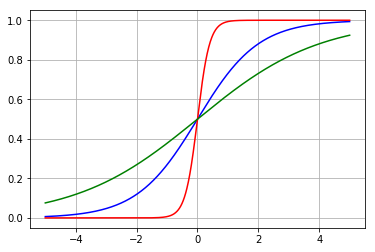

In [11]:
plt.plot(X, sig_Y, color = 'b')
plt.plot(X, sig_5Y, color = 'r')
plt.plot(X, sig_05Y, color = 'g')

plt.grid()
plt.show()

In [12]:
def sig_shift(x, b):
    return 1/(1+ np.exp(-x +b))

In [15]:
sig_shift2_Y = sig_shift(X, 2)
sig_shift_2_Y = sig_shift(X, -2)

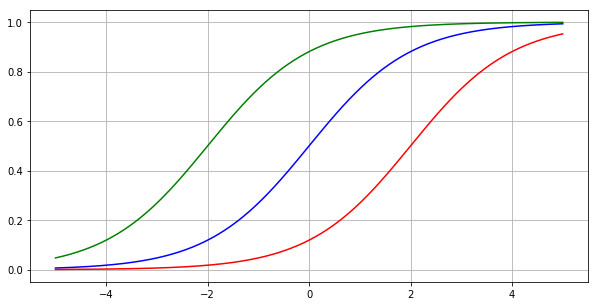

In [19]:
plt.figure(figsize=(10,5))
plt.plot(X, sig_Y, color = 'b')
plt.plot(X, sig_shift2_Y, color = 'r')
plt.plot(X, sig_shift_2_Y, color = 'g')

plt.grid()
plt.show()

# 코딩으로 확인하는 로지스틱 회귀

In [20]:
import tensorflow as tf
import numpy as np

data = [[2,0],[4,0],[6,0],[8,1],[10,1],[12,1],[14,1]]
x_data = [x_row[0] for x_row in data]
y_data = [y_row[1] for y_row in data]

In [21]:
a = tf.Variable(tf.random_normal([1], dtype=tf.float64, seed=0))
b = tf.Variable(tf.random_normal([1], dtype=tf.float64, seed=0))

In [22]:
y = 1/(1+ np.e**(-a * x_data + b))

In [23]:
loss = -tf.reduce_mean(np.array(y_data) * tf.log(y) + 
                       (1 - np.array(y_data)) * tf.log(1 - y))

In [24]:
learning_rate = 0.5
gradient_decent = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

W0808 10:35:59.803699  3440 deprecation.py:323] From C:\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [26]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(60001):
        sess.run(gradient_decent)
        if i % 6000 == 0 :
            print("Epoch: %.f, loss = %.4f, 기울기 a = %.4f, y 절편 = %.4f"
                 % (i, sess.run(loss), sess.run(a), sess.run(b)))

Epoch: 0, loss = 4.4835, 기울기 a = 2.3946, y 절편 = -0.8820
Epoch: 6000, loss = 0.0152, 기울기 a = 2.9209, y 절편 = 20.2966
Epoch: 12000, loss = 0.0081, 기울기 a = 3.5636, y 절편 = 24.8002
Epoch: 18000, loss = 0.0055, 기울기 a = 3.9556, y 절편 = 27.5458
Epoch: 24000, loss = 0.0041, 기울기 a = 4.2380, y 절편 = 29.5227
Epoch: 30000, loss = 0.0033, 기울기 a = 4.4585, y 절편 = 31.0672
Epoch: 36000, loss = 0.0028, 기울기 a = 4.6395, y 절편 = 32.3343
Epoch: 42000, loss = 0.0024, 기울기 a = 4.7929, y 절편 = 33.4084
Epoch: 48000, loss = 0.0021, 기울기 a = 4.9261, y 절편 = 34.3404
Epoch: 54000, loss = 0.0019, 기울기 a = 5.0436, y 절편 = 35.1634
Epoch: 60000, loss = 0.0017, 기울기 a = 5.1489, y 절편 = 35.9003


# 여러 입력을 받는 로지스틱 회귀

In [27]:
import tensorflow as tf
import numpy as np

In [28]:
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

In [30]:
x_data = np.array([[2,3],[4,3],[6,4],[8,6],[10,7],[12,8],[14,9]])
y_data = np.array([0,0,0,1,1,1,1]).reshape(7,1)

In [31]:
X = tf.placeholder(tf.float64, shape=[None, 2])
Y = tf.placeholder(tf.float64, shape=[None, 1])

In [32]:
a = tf.Variable(tf.random_uniform([2,1], dtype=tf.float64))
b = tf.Variable(tf.random_uniform([1], dtype=tf.float64))

In [33]:
y = tf.sigmoid(tf.matmul(X,a)+b)

In [34]:
loss = -tf.reduce_mean(Y * tf.log(y) + (1 - Y) * tf.log(1 - y))

In [35]:
learning_rate = 0.1

In [37]:
gradient_decent = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

predicted = tf.cast(y > 0.5, dtype = tf.float64)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype = tf.float64))

In [49]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(3001):
        a_, b_, loss_, _ = sess.run([a, b, loss, gradient_decent], 
                                    feed_dict={X: x_data, Y : y_data})
        if (i + 1) % 300 == 0:
            print("step = %d, a1 = %.4f, a2 = %.4f, b = %.4f, loss = %.4f"
                  % (i+1, a_[0], a_[1], b_, loss_))
        
        
    new_x = np.array([7,6]).reshape(1,2)
    new_y = sess.run(y, feed_dict = {X: new_x})
    print("공부한 시간: %d, 과외 수업 횟수: %d" % (new_x[:,0], new_x[:,1]))
    print("합격 가능성: %6.2f %%" % (new_y*100))

step = 300, a1 = 0.8181, a2 = -0.5699, b = -2.3646, loss = 0.2709
step = 600, a1 = 0.8228, a2 = -0.3019, b = -3.8511, loss = 0.1935
step = 900, a1 = 0.7348, a2 = 0.0245, b = -4.9240, loss = 0.1511
step = 1200, a1 = 0.6321, a2 = 0.3307, b = -5.7717, loss = 0.1235
step = 1500, a1 = 0.5337, a2 = 0.6041, b = -6.4740, loss = 0.1042
step = 1800, a1 = 0.4444, a2 = 0.8453, b = -7.0741, loss = 0.0900
step = 2100, a1 = 0.3650, a2 = 1.0585, b = -7.5982, loss = 0.0791
step = 2400, a1 = 0.2947, a2 = 1.2476, b = -8.0635, loss = 0.0705
step = 2700, a1 = 0.2324, a2 = 1.4166, b = -8.4820, loss = 0.0636
step = 3000, a1 = 0.1770, a2 = 1.5686, b = -8.8623, loss = 0.0579
공부한 시간: 7, 과외 수업 횟수: 6
합격 가능성:  85.68 %
